# Trains

In [2]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import json
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
fichier_json = 'gares-de-voyageurs.geojson'

with open(fichier_json, 'r', encoding='utf-8') as f:
    data = json.load(f)

# On cible la clé 'features' qui contient la liste des gares pour manipuler avec pd
df_gares = pd.json_normalize(data['features'])
df_gares = df_gares.dropna(subset=['geometry.coordinates'])

# Les colonnes qui s'appellent par ex properties.nom, geometry.coordinates sont simplifiées
df_gares.columns = [c.replace('properties.', '').replace('geometry.', '') for c in df_gares.columns]

coordinates = pd.DataFrame(df_gares['coordinates'].tolist(), index=df_gares.index)
df_gares['longitude'] = coordinates[0]
df_gares['latitude'] = coordinates[1]

colonnes_utiles = [
    'nom', 
    'codeinsee', 
    'latitude', 
    'longitude', 
    'segment_drg'
    ]

colonnes_finales = [c for c in colonnes_utiles if c in df_gares.columns]
df_gares_clean = df_gares[colonnes_finales]

print(f"{len(df_gares_clean)} gares récupérées.")
print(df_gares_clean.head())

df_gares_clean.to_csv("gares_sncf_final.csv", index=False)
# pd.read_csv("gares_sncf_final.csv").head()

2778 gares récupérées.
                     nom codeinsee   latitude  longitude segment_drg
0              Abancourt     60001  49.685224   1.774306           C
1               Abbaretz     44001  47.554643  -1.524416           C
2              Abbeville     80001  50.102210   1.824490           B
3        Ablon-sur-Seine     94001  48.725468   2.419151           B
4  Achères Grand Cormier     78551  48.955183   2.091903           B


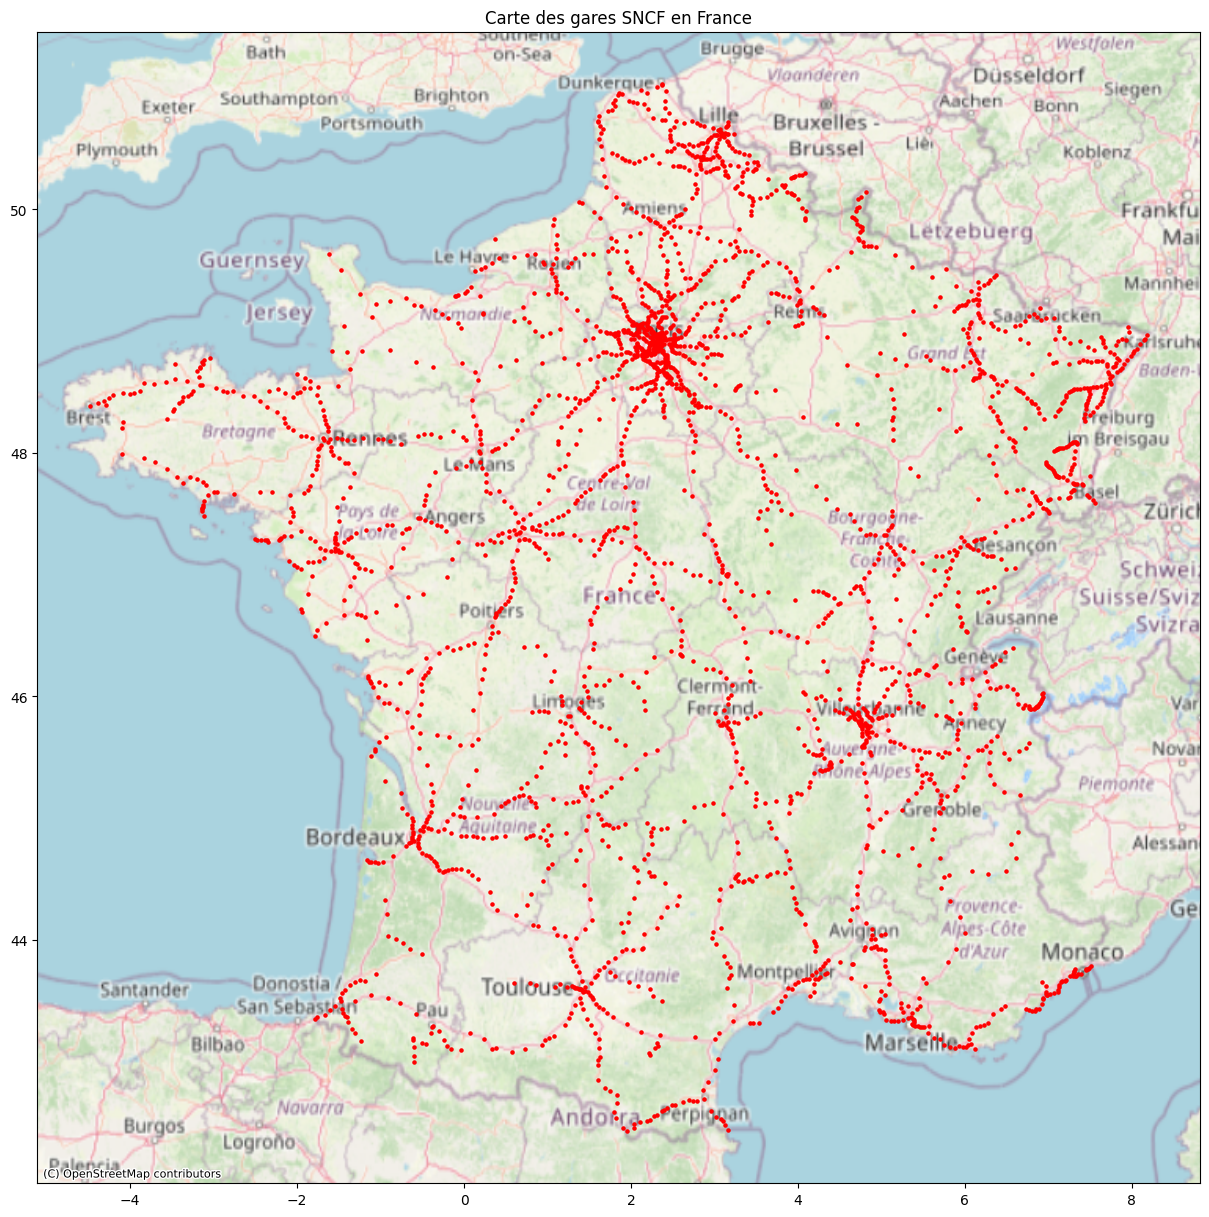

In [16]:
# Représentation spatiale
gdf_gares = gpd.GeoDataFrame(
    df_gares_clean,
    geometry=gpd.points_from_xy(df_gares_clean['longitude'], df_gares_clean['latitude']),
    crs="EPSG:4326"  # Système de coordonnées WGS84
)

fig, ax = plt.subplots(figsize=(15, 15))

gdf_gares.plot(ax=ax, color='red', markersize=5, label='Gares SNCF')
ctx.add_basemap(ax, crs=gdf_gares.crs, source=ctx.providers.OpenStreetMap.Mapnik) # fond de carte OpenStreetMap
plt.title("Carte des gares SNCF en France")

plt.show()